# Brain Stroke Prediction Dataset

A stroke is a medical condition in which poor blood flow to the brain causes cell death.There are two main types of stroke: ischemic, due to lack of blood flow, and hemorrhagic, due to bleeding. Both cause parts of the brain to stop functioning properly. The aim of the Notebook is to check the quality of the data and determine which features are important. The notebook has used statistical methods like p-value, t-statistics and visualization techniques like histogram, Q-Q plot, scatter plot, box-plot of python's matplotlib and seaborn library to answer below questions about the dataset 
- What are the data types? (Only numeric and categorical)
- Are there missing values?
- What are the likely distributions of the numeric variables?
- Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)
- Which independent variables have missing data? How much? 
- Do the training and test sets have the same data?
- In the predictor variables independent of all the other predictor variables?
- Which predictor variables are the most important?
- Do the ranges of the predictor variables make sense?
- What are the distributions of the predictor variables?   
- Remove outliers and keep outliers (does if have an effect of the final predictive model)?
- R-emove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

Overall, the data looks clean and there are no missing and inconsistent values. The significance of the predictors is investigated and it appears that all independent variables are significant except one, these results can be used to further optimize the model for predicting abalone's age and give better predictions

## Importing Libraries and Dataset

In [1]:
!pip uninstall eli5 --yes

Found existing installation: eli5 0.13.0
Uninstalling eli5-0.13.0:
  Successfully uninstalled eli5-0.13.0


In [2]:
#installing dependencies
!pip install eli5

  Using cached eli5-0.13.0-py2.py3-none-any.whl


In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

In [9]:
#Reading the brain stroke data
data=pd.read_csv("full_data.csv")

### The dataset consists of:

- 10 health conditions and other basic lifestyle info of patients i.e. gender, age, hypertension, heartdisease, evermarried, worktype, Residencetype, avgglucoselevel, bmi, smoking status - The independent variables
- Whether the patient had a stroke - The dependent variable
- The stroke column is 1 if the patient had a stroke or 0 if not.
- There are a total of 4981 observations.

#### Columns Information
1) gender: "Male", "Female" or "Other"<br>
2) age: age of the patient<br>
3) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension<br>
4) heartdisease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease<br>
5) evermarried: "No" or "Yes"<br>
6) worktype: "children", "Govtjov", "Neverworked", "Private" or "Self-employed"<br>
7) Residencetype: "Rural" or "Urban"<br>
8) avgglucoselevel: average glucose level in blood<br>
9) bmi: body mass index<br>
10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*<br>
11) stroke: 1 if the patient had a stroke or 0 if not<br>
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

Let the features be divided into two categories before we start EDA:
1) Categorical : gender, ever_married, work_type, residence_type, smoking_status<br>
2) Numerical : age, hypertension, heart_disease, avg_glucose_level, bmi
 * hyoertension & heart_disease have int dtypes, but we can check out that they are in categorical style

In [10]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [11]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [13]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [14]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


### Check for missing data

In [15]:
#checking if any data is missing
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

No data is missing from any of the columns, which means it is not required to impute or remove the null values from the data. Therefore, no independent variable has missing data.

## Exploratory Data Analysis(EDA)

### Categorical variables

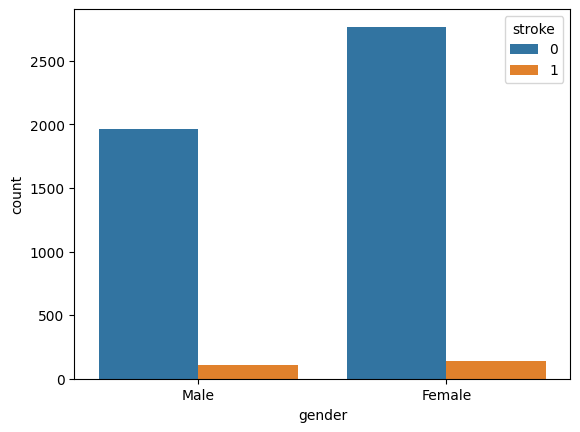

In [16]:
#Stroke/Gender
sns.countplot(x='gender', hue='stroke', data=data)
plt.show()

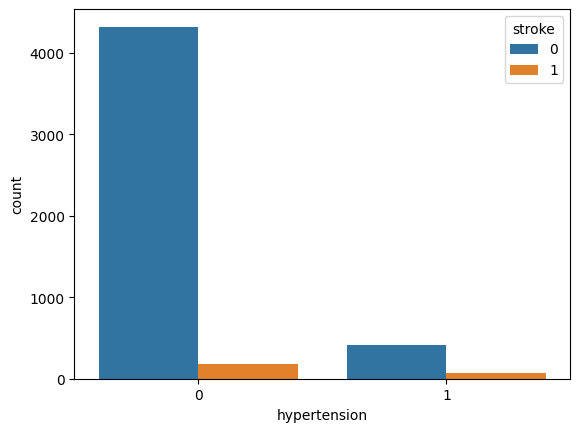

In [17]:
#Stroke/Hypertension
sns.countplot(x='hypertension', hue='stroke', data=data)
plt.show()

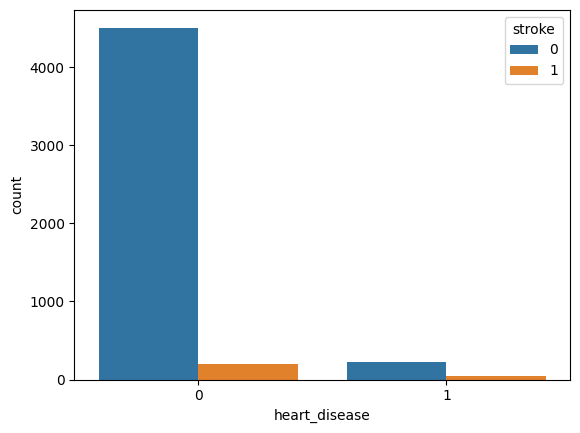

In [18]:
#Stroke/Heart_disease
sns.countplot(x='heart_disease', hue='stroke', data=data)
plt.show()

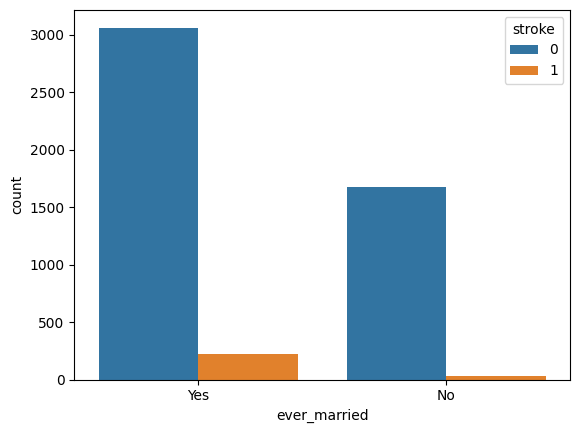

In [19]:
#Stroke/Ever_married
sns.countplot(x='ever_married', hue='stroke', data=data)
plt.show()

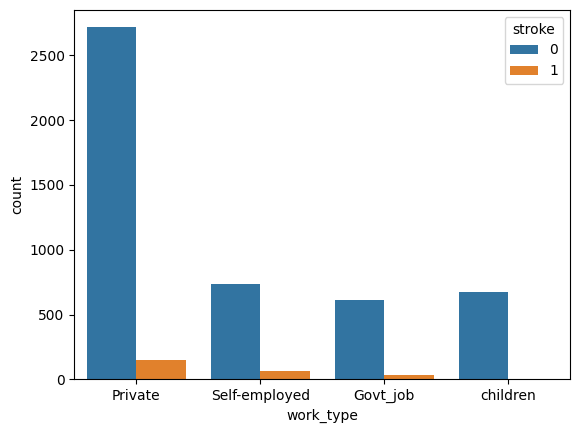

In [20]:
#Stroke/Work_type
sns.countplot(x='work_type', hue='stroke', data=data)
plt.show()

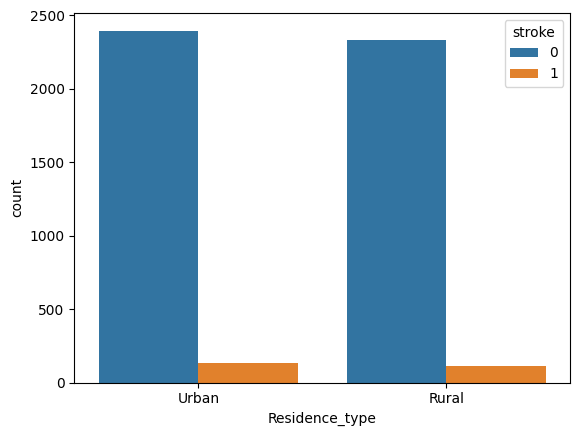

In [21]:
#Stroke/Residence_type
sns.countplot(x='Residence_type', hue='stroke', data=data)
plt.show()

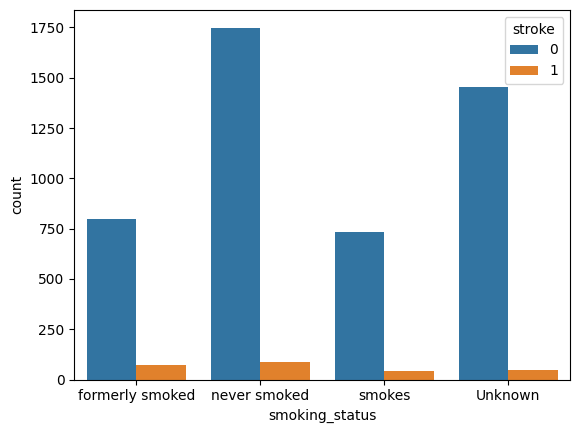

In [22]:
#Stroke/Smoking_status
sns.countplot(x='smoking_status', hue='stroke', data=data)
plt.show()

### The likely distributions of numeric variables

<Figure size 800x500 with 0 Axes>

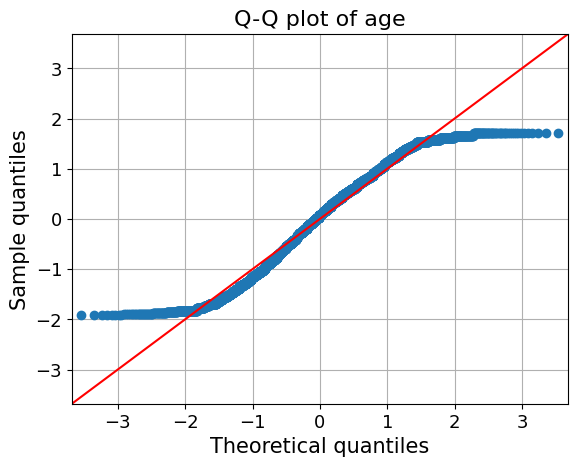

<Figure size 800x500 with 0 Axes>

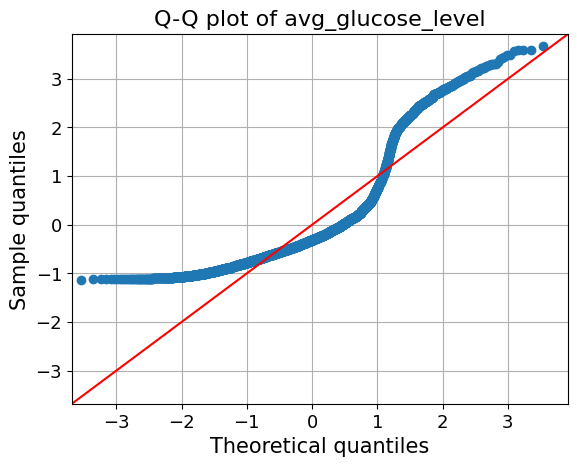

<Figure size 800x500 with 0 Axes>

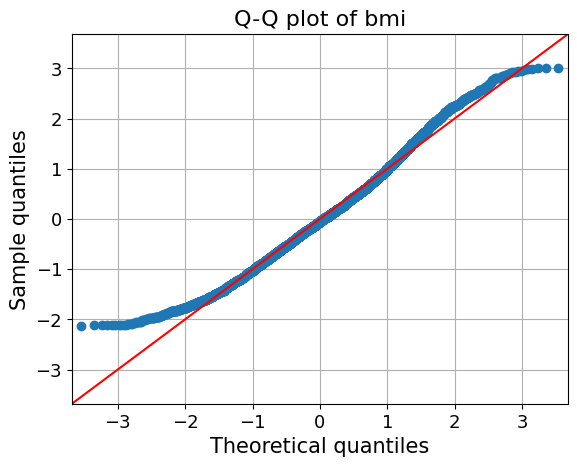

In [25]:
#checking the distribution of independent variables with qqplot
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['age','avg_glucose_level', 'bmi']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

<AxesSubplot: xlabel='bmi', ylabel='Count'>

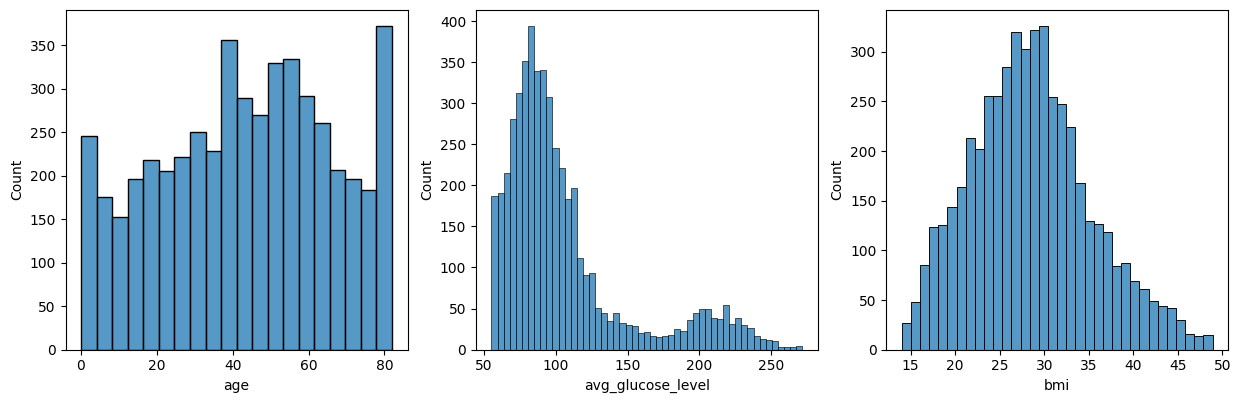

In [26]:
#checking the overall distribution of continuous data variables with seaborn.distplot
plt.figure(figsize = (15,15))
plt.subplot(3,3,1)
sns.histplot(data.age, kde = False)

plt.subplot(3,3,2)
sns.histplot(data.avg_glucose_level, kde = False)

plt.subplot(3,3,3)
sns.histplot(data.bmi, kde = False)


Looking at the plot above, it appears that one independent numeric variable the BMI is following normal distribution, while avg_glucose_level does not, and we can find that most patients are at a normal level. And age variable is roughly following normal distribution, there are a few outliers in few of age variable which shows data have a concentration in 80 years old patients.



<AxesSubplot: >

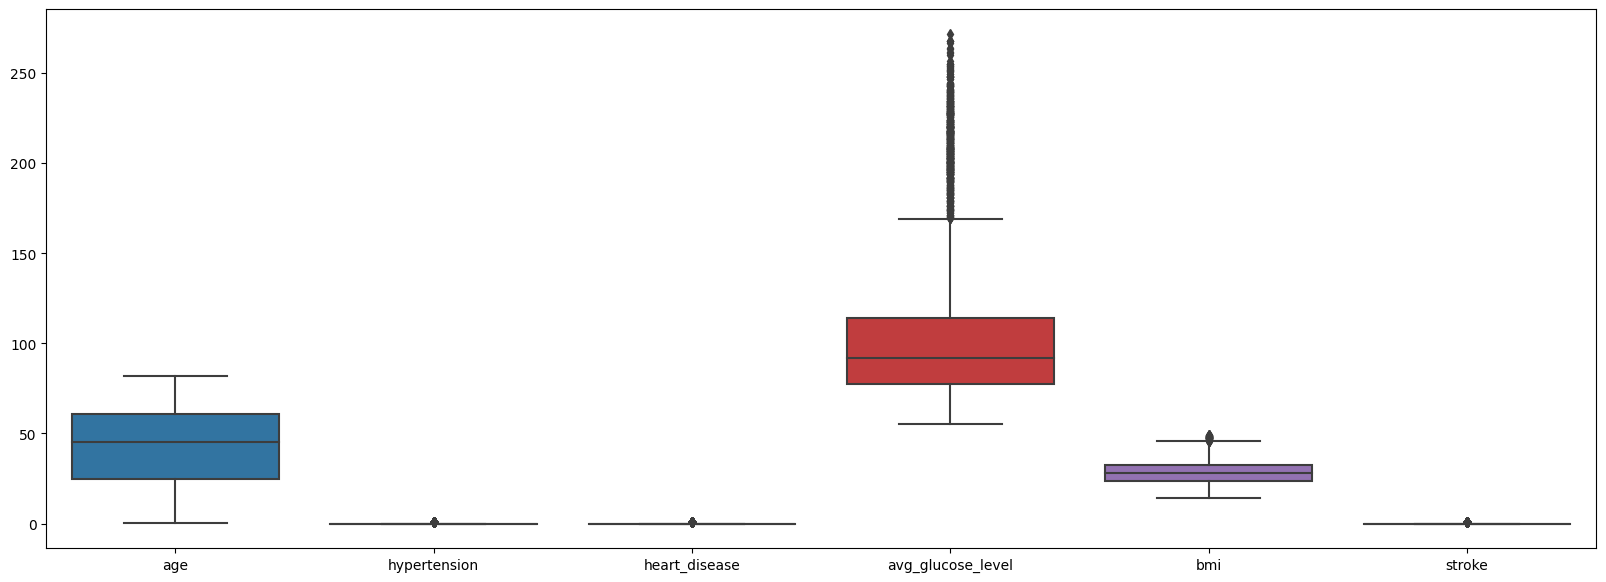

In [27]:
#Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,7))
sns.boxplot(data=data)


it is hard to visualize and read data as they are not in same ranges, I'll try to normalize the data for a better understanding and visualization. It will also help later to get normalized coeffiecients when building the Model.

### Data transfering and normalizing

In [28]:
#convering categorical features to numerical
data['gender'] = data['gender'].map({'Male':1,'Female':0})
data['ever_married'] = data['ever_married'].map({'Yes':1,'No':0})
data = pd.get_dummies(data,columns=['work_type','smoking_status','Residence_type'],drop_first=True)

#Scaling the data
#sc = StandardScaler()
#df_no_scaled = data[['age','avg_glucose_level','bmi']]
#data.drop(['age','avg_glucose_level','bmi'],axis=1,inplace=True)
#df_no_scaled = df_no_scaled.values
#df_no_scaled = sc.fit_transform(df_no_scaled)
#df_no_scaled = pd.DataFrame(df_no_scaled,columns = ['age','avg_glucose_level','bmi'])
#data = pd.concat([df_no_scaled,data],axis=1)
data.head()


,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Urban
0,1,67.0,0,1,1,228.69,36.6,1,1,0,0,1,0,0,1
1,1,80.0,0,1,1,105.92,32.5,1,1,0,0,0,1,0,0
2,0,49.0,0,0,1,171.23,34.4,1,1,0,0,0,0,1,1
3,0,79.0,1,0,1,174.12,24.0,1,0,1,0,0,1,0,0
4,1,81.0,0,0,1,186.21,29.0,1,1,0,0,1,0,0,1


In [29]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'stroke', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'Residence_type_Urban'],
      dtype='object')

<AxesSubplot: >

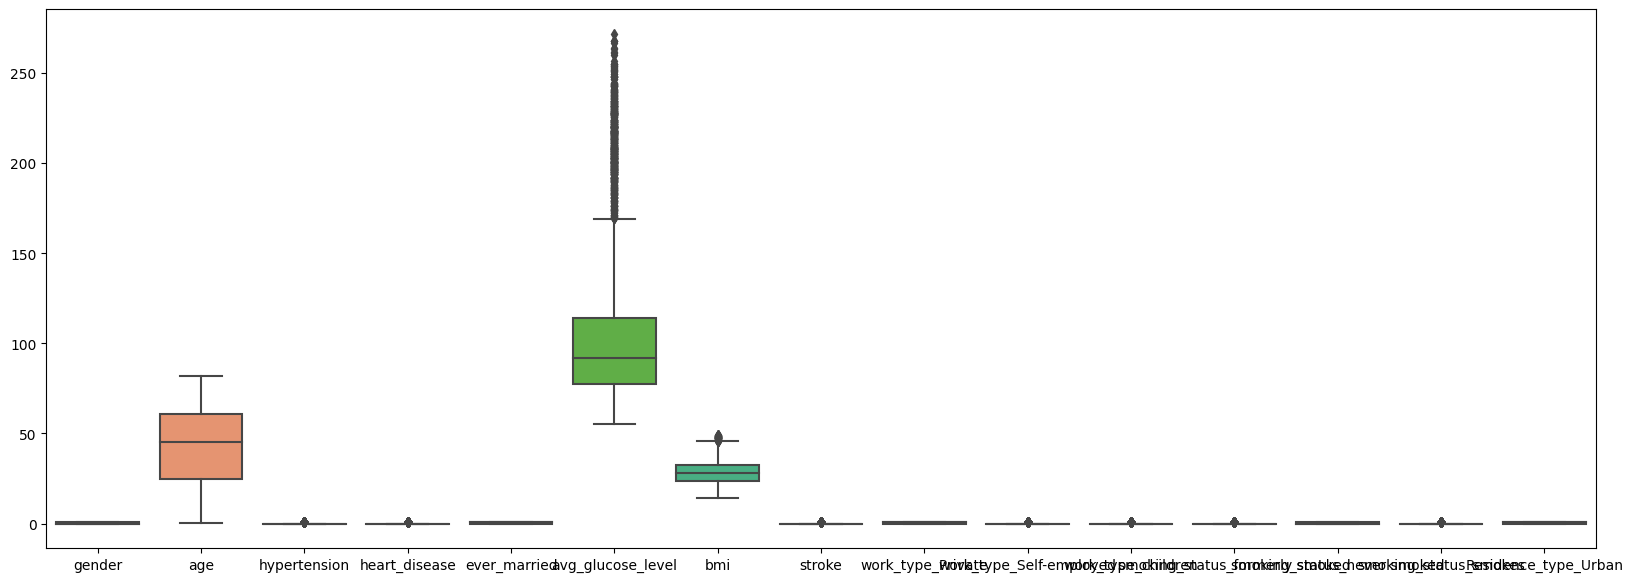

In [30]:
#Checking the Ranges of the predictor variables and dependent variable after normalizing
plt.figure(figsize=(20,7))
sns.boxplot(data=data)

### Feature Engineering
#### Correlation

In [31]:
#checking the correlation between all the features in the data
data.corr()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,Residence_type_Urban
gender,1.000000,-0.026538,0.021485,0.086476,-0.028971,0.055796,-0.012093,0.008870,-0.028706,-0.029635,0.090275,0.045109,-0.102387,0.013349,-0.004301
age,-0.026538,1.000000,0.278120,0.264852,0.677137,0.236763,0.373703,0.246478,0.111020,0.326835,-0.636866,0.235508,0.122617,0.070899,0.017155
hypertension,0.021485,0.278120,1.000000,0.111974,0.164534,0.170028,0.158762,0.131965,-0.004177,0.110468,-0.128924,0.056797,0.065267,0.030749,-0.004755
heart_disease,0.086476,0.264852,0.111974,1.000000,0.114765,0.166847,0.060926,0.134610,-0.001600,0.087474,-0.092974,0.067541,-0.022727,0.044011,0.002125
ever_married,-0.028971,0.677137,0.164534,0.114765,1.000000,0.150724,0.371690,0.108398,0.146139,0.191668,-0.548851,0.172039,0.104120,0.106234,0.008191
avg_glucose_level,0.055796,0.236763,0.170028,0.166847,0.150724,1.000000,0.186348,0.133227,0.020764,0.058419,-0.101960,0.066989,0.024727,0.017873,0.001346
bmi,-0.012093,0.373703,0.158762,0.060926,0.371690,0.186348,1.000000,0.056926,0.211820,0.085582,-0.484257,0.120156,0.109322,0.100710,0.013185
stroke,0.008870,0.246478,0.131965,0.134610,0.108398,0.133227,0.056926,1.000000,0.010459,0.062643,-0.085075,0.065320,-0.004806,0.008561,0.016494
work_type_Private,-0.028706,0.111020,-0.004177,-0.001600,0.146139,0.020764,0.211820,0.010459,1.000000,-0.509458,-0.458968,0.022685,0.109936,0.096769,-0.016104
work_type_Self-employed,-0.029635,0.326835,0.110468,0.087474,0.191668,0.058419,0.085582,0.062643,-0.509458,1.000000,-0.173407,0.092186,0.030898,-0.003396,0.013427


<AxesSubplot: >

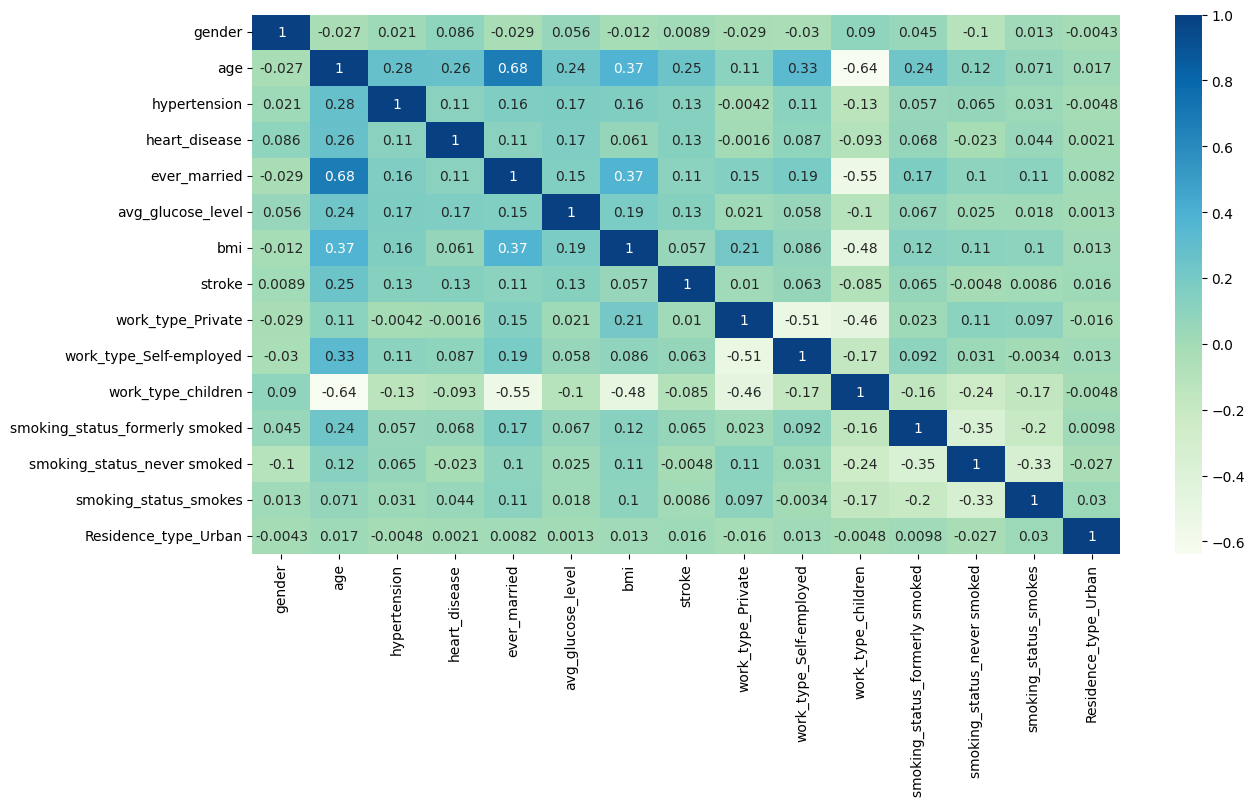

In [32]:
#the heat map of the correlation
correlation = data.corr()
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'GnBu')

We can find that in original numeric variables, the co-relation between age and bmi being the highest.

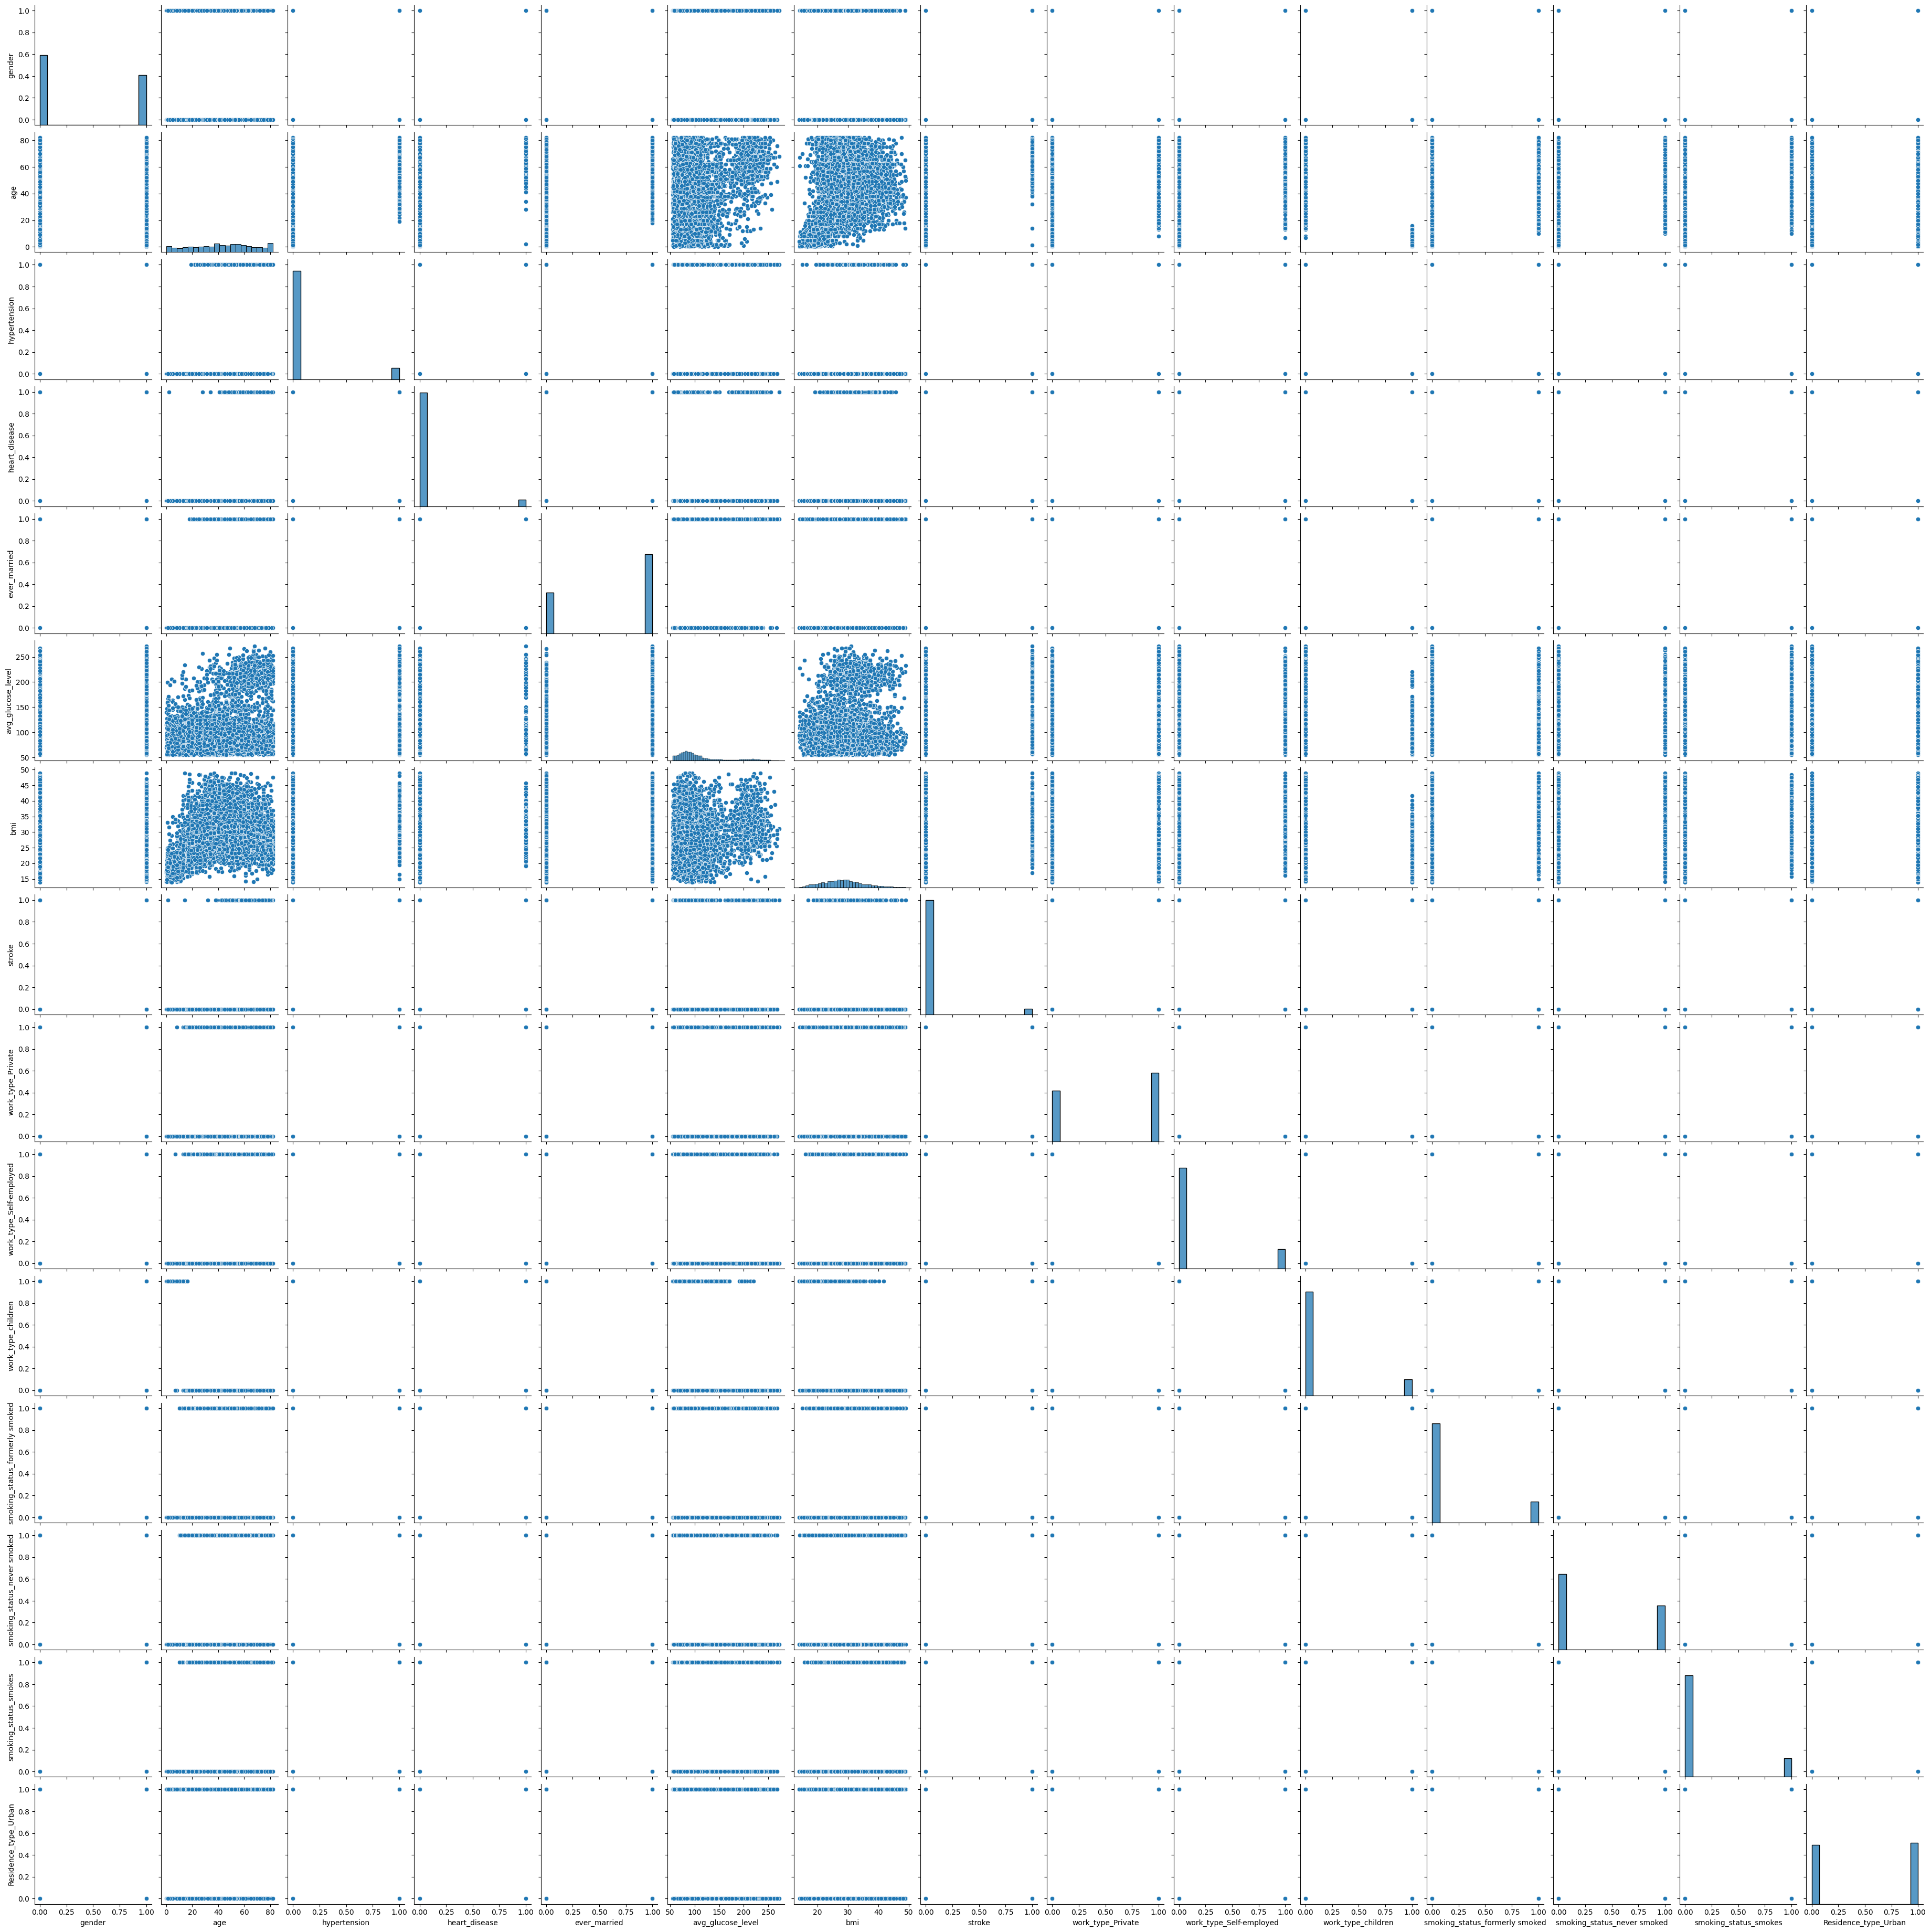

In [33]:
#sns.pairplot(data.loc[:, ['age', 'avg_glucose_level', 'bmi']])
sns.pairplot(data)
plt.show()

#### Logit finding the P-value

In [34]:
#Using Logit for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.Logit(data['stroke'], data[['age', 'avg_glucose_level', 'bmi', 'gender', 'hypertension',
       'heart_disease', 'ever_married', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'Residence_type_Urban']]).fit()

# Print out the statistics
model.summary()

Optimization terminated successfully.
         Current function value: 0.179503
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 4981
Model:                          Logit   Df Residuals:                     4967
Method:                           MLE   Df Model:                           13
Date:                Sun, 30 Oct 2022   Pseudo R-squ.:                 0.09293
Time:                        16:34:43   Log-Likelihood:                -894.11
converged:                       True   LL-Null:                       -985.71
Covariance Type:            nonrobust   LLR p-value:                 3.753e-32
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
age                                0.0374      0.004      8.916      0.000       0.029       0.046
avg_glucose_level                  0.0028      0.001      2.139      0.032       0.000       0.005
bmi                               -0.1290      0.009    -13.765      0.000      -0.147      -0.111
gender                            -0.0894      0.137     -0.653      0.514      -0.358       0.179
hypertension                       0.8392      0.167      5.015      0.000       0.511       1.167
heart_disease                      0.6409      0.195      3.283      0.001       0.258       1.023
ever_married                      -0.5409      0.181     -2.992      0.003      -0.895      -0.187
work_type_Private                 -0.7130      0.157     -4.552      0.000      -1.020      -0.406
work_type_Self-employed           -0.7905      0.198     -3.993      0.000      -1.179      -0.403
work_type_children                -3.6690      0.726     -5.052      0.000      -5.092      -2.246
smoking_status_formerly smoked    -0.3310      0.185     -1.791      0.073      -0.693       0.031
smoking_status_never smoked       -0.7636      0.168     -4.546      0.000      -1.093      -0.434
smoking_status_smokes             -0.5196      0.207     -2.515      0.012      -0.924      -0.115
Residence_type_Urban              -0.1630      0.129     -1.259      0.208      -0.417       0.091
==================================================================================================
"""

## Considering the significance value of 0.05:
1. The **age** has the p-value 0, which is lesser and hence it is a significant feature.
2. The **avg_glucose_level** has the p-value 0.032, which is lesser and hence it is a significant feature.
3. The **bmi** has the p-value 0, which is lesser and hence it is a significant feature.
4. The **gender** has the p-value 0.514, which is greater and hence it is a non significant feature.
5. The **hypertension** has the p-value 0, which is lesser and hence it is a significant feature.
6. The **heart_disease** has the p-value 0.001, which is lesser and hence it is a significant feature.
7. The **ever_married** has the p-value 0.003, which is lesser and hence it is a significant feature.
8. The **work_type_Private** has the p-value 0, which is lesser and hence it is a significant feature.
9. The **work_type_Self-employed** has the p-value 0.00, which is lesser and hence it is a significant feature.
10. The **work_type_children** has the p-value 0, which is lesser and hence it is a significant feature.
11. The **smoking_status_formerly** smoked has the p-value 0.073, which is greater and hence it is a non significant feature.
12. The **smoking_status_never** smoked has the p-value 0, which is lesser and hence it is a significant feature. 
13. The **smoking_status_smokes** smoked has the p-value 0.012, which is lesser and hence it is a significant feature. 
14. The **Residence_type_Urban** has the p-value 0.208, which is lesser and hence it is a significant feature.


## Building Model

### Train-Valid-Test slit

In [35]:
from sklearn.model_selection import  train_test_split

X = data[['age', 'avg_glucose_level', 'bmi', 'gender', 'hypertension',
       'heart_disease', 'ever_married', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'Residence_type_Urban']]
y = data['stroke']


In [36]:
#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.35, random_state=1)

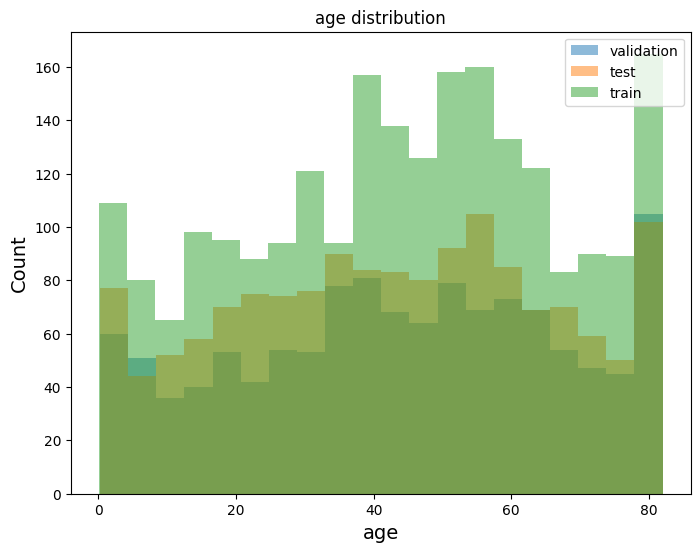

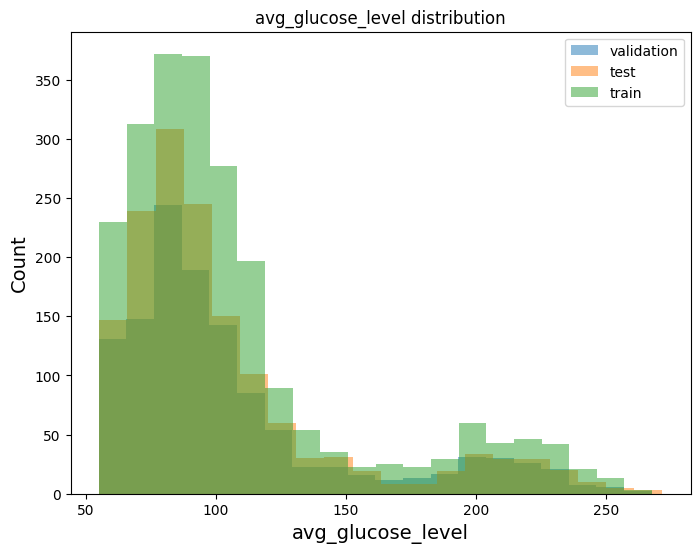

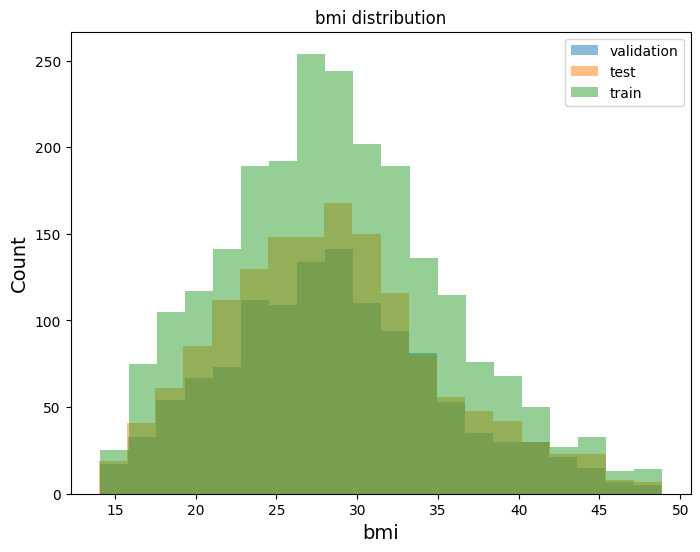

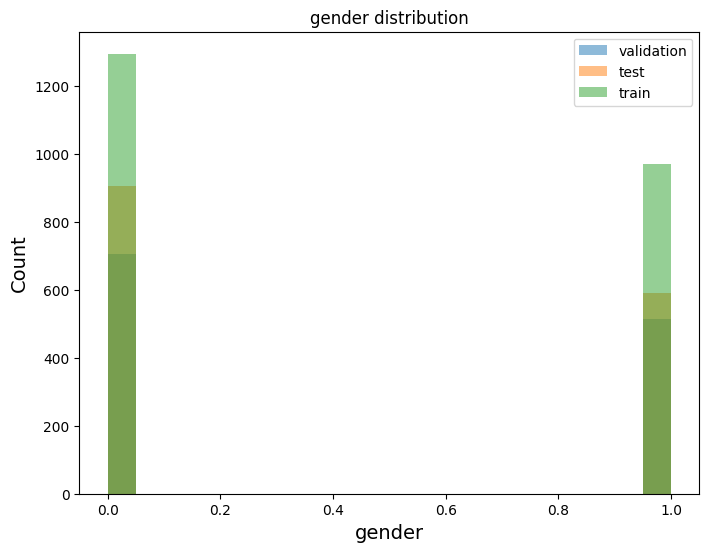

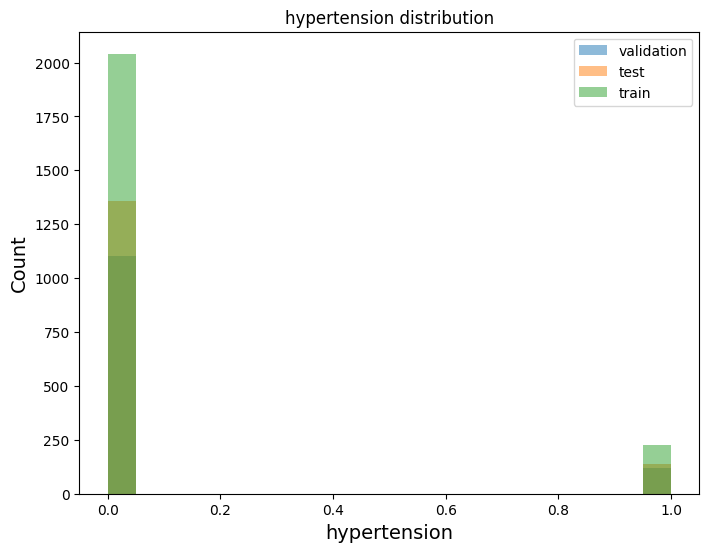

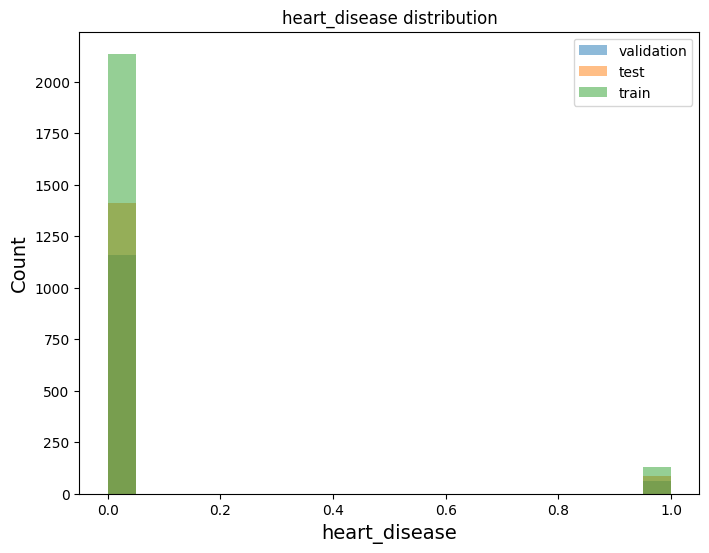

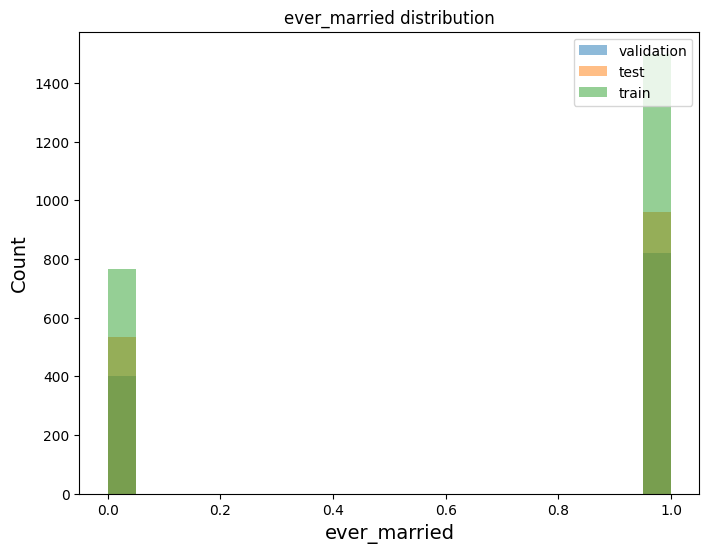

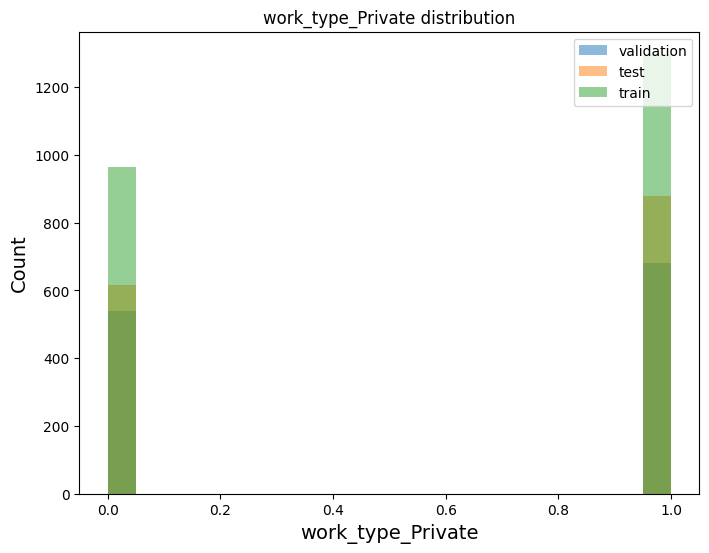

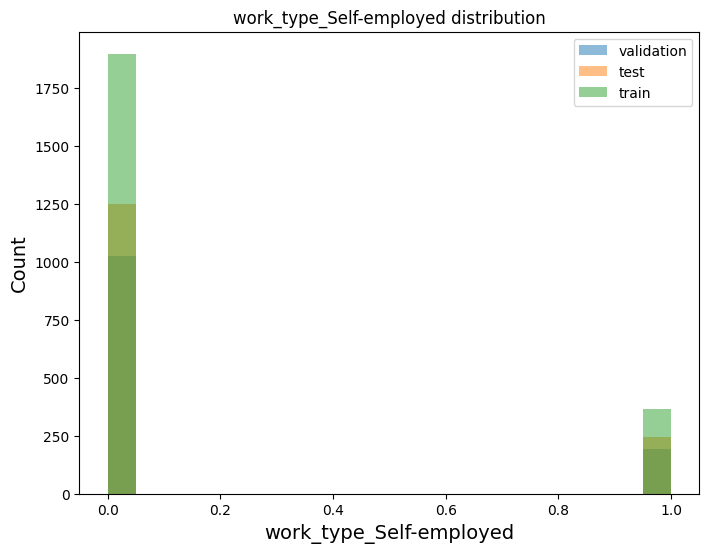

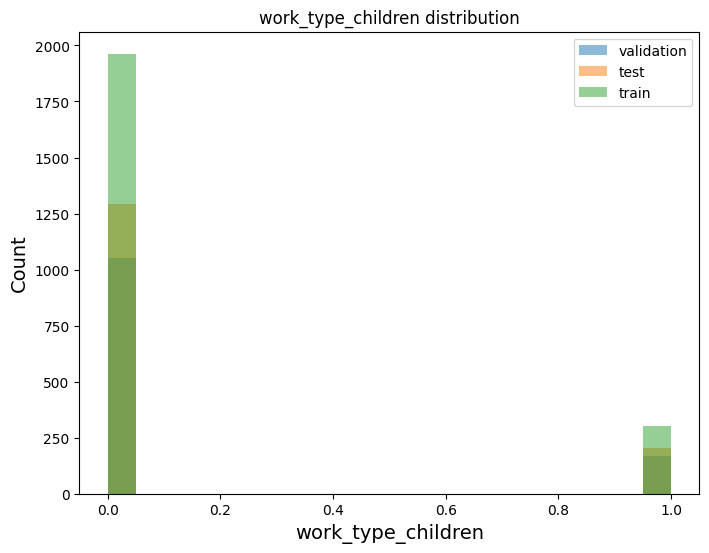

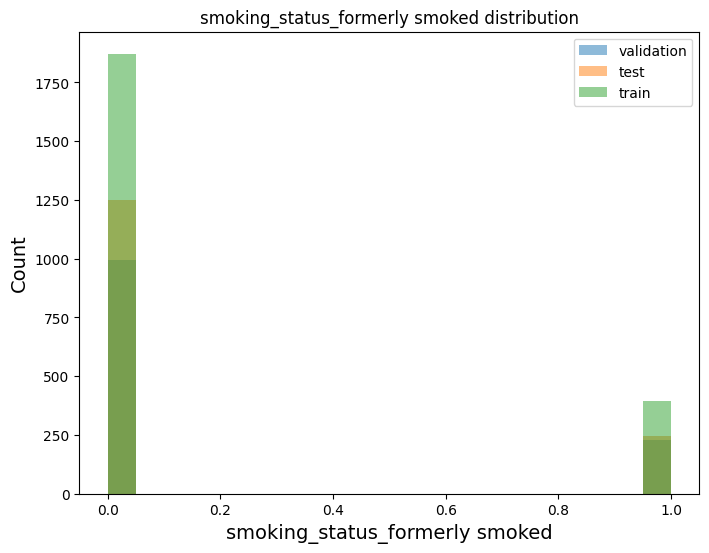

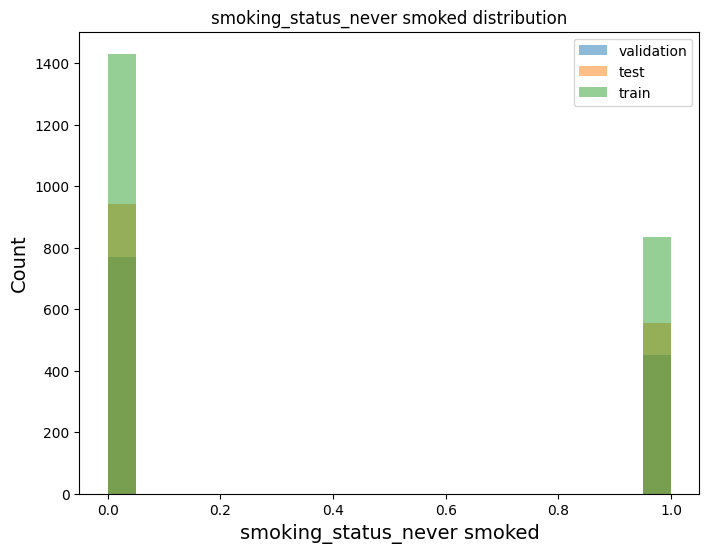

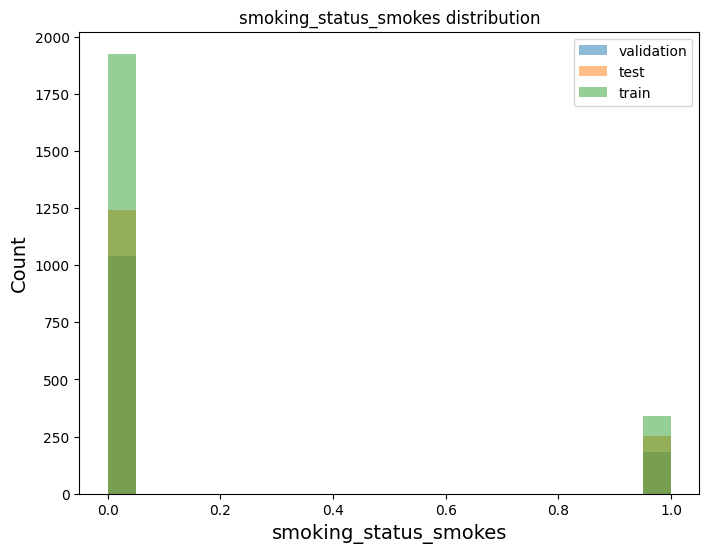

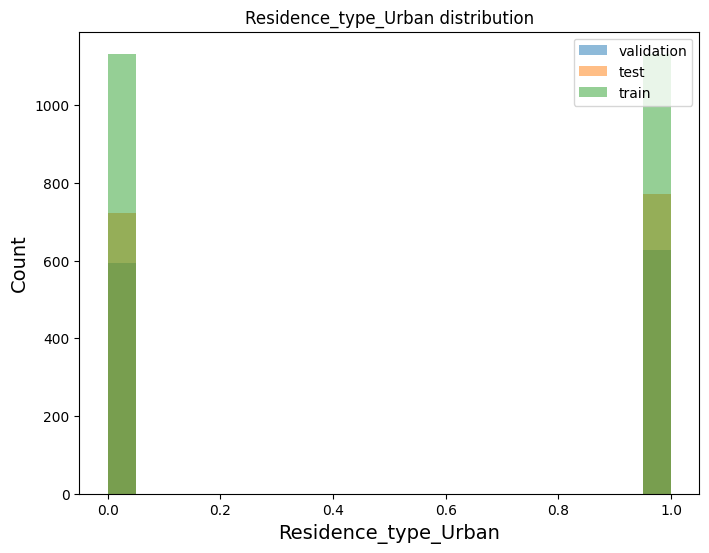

In [37]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['age', 'avg_glucose_level', 'bmi', 'gender', 'hypertension',
       'heart_disease', 'ever_married', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'Residence_type_Urban']]

X_val_plot = X_val[['age', 'avg_glucose_level', 'bmi', 'gender', 'hypertension',
       'heart_disease', 'ever_married', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'Residence_type_Urban']]

X_train_plot = X_train[['age', 'avg_glucose_level', 'bmi', 'gender', 'hypertension',
       'heart_disease', 'ever_married', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'Residence_type_Urban']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

1. The division of dataset in Test, train and validation sets looks fine except few boundary values of 'avg_glucose_level'and 'bmi' which appears to be missing in test and validation sets
2. No missing values in 'gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes', 'Residence_type_Urban'.

### Outliers

An outlier is a data point that differs significantly from other observations. Outliers can be problematic because they can affect the results of an analysis.
However, they can also be informative about the data you’re studying because they can reveal abnormal cases or individuals that have rare traits.

Herer we use Z-score to detect outliers and handling them.





In [41]:
from plotly.subplots import make_subplots #visualization
import plotly.graph_objects as go #visualization
# Set up the subplots grid
fig = make_subplots(rows=1, cols=3, 
                    # Set the subplot titles
                    subplot_titles=['Age', 'Avg glucose level', 'BMI'])
#create boxplot visualization of numeric columns
fig.add_trace(go.Box(x=X_train.age, name='', showlegend=False), row=1, col=1)
fig.add_trace(go.Box(x=X_train.avg_glucose_level, name='', showlegend=False), row=1, col=2)
fig.add_trace(go.Box(x=X_train.bmi, name='', showlegend=False), row=1, col=3)
#config size
fig.update_layout(height=400,font_family='Verdana',paper_bgcolor='#edeae7',plot_bgcolor='#edeae7')
#show visualizations
fig.show()

In [42]:
#round decimals
X_train_deloutlier = round(X_train, 2)
X_test_deloutlier = round(X_test, 2)
X_val_deloutlier =  round(X_val, 2)
#function to eliminate outliers base in Zscore
def Zscore_outlier(df):
    out=[]
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    out.sort()
    print(out)
Zscore_outlier(X_train_deloutlier['bmi'])
Zscore_outlier(X_train_deloutlier['avg_glucose_level'])

[]
[243.53, 243.58, 243.59, 243.73, 244.28, 244.3, 246.53, 247.48, 247.69, 247.87, 247.97, 250.2, 250.8, 251.6, 251.99, 253.16, 253.86, 254.63, 255.17, 266.59, 267.6, 267.76]


In [43]:
X_train_deloutlier.loc[X_train_deloutlier.bmi >= 47, 'bmi'] = 46
X_train_deloutlier.loc[X_train_deloutlier.avg_glucose_level >= 170, 'avg_glucose_level'] = 170



#### Logistic Regression understanding the important features

##### Logistic Regression with  dataset which remove outlier

In [45]:
pip install eli5

  Using cached eli5-0.13.0-py2.py3-none-any.whl
  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
Note: you may need to restart the kernel to use updated packages.


In [46]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

#Create Logistic regression object
logit = LogisticRegression(max_iter=1000)
# Train the model using the training sets
logit.fit(X_train_deloutlier, y_train)
# Make predictions using the training set
y_pred = logit.predict(X_train_deloutlier)

# Create linear regression object
#regrout = linear_model.LinearRegression()
# Train the model using the training sets
#regrout.fit(X_train_deloutlier,y_train)
# Make predictions using the training set
#y_pred = regrout.predict(X_train_deloutlier)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

# Make predictions using the testing set
y_pred = logit.predict(X_test_deloutlier)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

# Make predictions using the validation set
y_pred = logit.predict(X_val_deloutlier)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)

#Understanding the important features 
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(logit, random_state=1).fit(X_test_deloutlier, y_test)
eli5.show_weights(perm, feature_names = X_test_deloutlier.columns.tolist())

Mean squared error: 0.05
Coefficient of determination: -0.05
R^2 score on tarining set = -0.04812586765386406
Mean squared error: 0.05
Coefficient of determination: -0.04
R^2 score on test set = -0.04060960196362173
Mean squared error: 0.05
Coefficient of determination: -0.06
R^2 score on validation set = -0.05805892547660285


Weight,Feature
0.0004 ± 0.0007,avg_glucose_level
0.0004 ± 0.0011,age
0 ± 0.0000,smoking_status_never smoked
0 ± 0.0000,work_type_Self-employed
0 ± 0.0000,work_type_Private
0 ± 0.0000,ever_married
0 ± 0.0000,heart_disease
0 ± 0.0000,hypertension
0 ± 0.0000,gender
0 ± 0.0000,bmi


#### Logistic Regression with dataset have outliers

In [47]:
#Create Logistic regression object
logit = LogisticRegression(max_iter=1000)
# Train the model using the training sets
logit.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [48]:
# Make predictions using the training set
y_pred = logit.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)
print(f"Logistic Regression F1 Score: {metrics.f1_score(y_train, y_pred, average='micro')}")

Mean squared error: 0.05
Coefficient of determination: -0.05
R^2 score on tarining set = -0.04812586765386406
Logistic Regression F1 Score: 0.954083885209713


In [49]:
# Make predictions using the testing set
y_pred = logit.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)
print(f"Logistic Regression F1 Score: {metrics.f1_score(y_test, y_pred, average='micro')}")


Mean squared error: 0.05
Coefficient of determination: -0.04
R^2 score on test set = -0.04060960196362173
Logistic Regression F1 Score: 0.9491638795986622


In [50]:
# Make predictions using the validation set
y_pred = logit.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)
print(f"Logistic Regression F1 Score: {metrics.f1_score(y_val, y_pred, average='micro')}")

Mean squared error: 0.05
Coefficient of determination: -0.06
R^2 score on validation set = -0.05805892547660285
Logistic Regression F1 Score: 0.9451269451269452


In [51]:
#Understanding the important features 
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(logit, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0007 ± 0.0000,hypertension
0.0007 ± 0.0000,avg_glucose_level
0.0005 ± 0.0005,age
0.0004 ± 0.0007,smoking_status_smokes
0 ± 0.0000,Residence_type_Urban
0 ± 0.0000,smoking_status_never smoked
0 ± 0.0000,smoking_status_formerly smoked
0 ± 0.0000,work_type_Self-employed
0 ± 0.0000,work_type_Private
0 ± 0.0000,ever_married


The permutaion importance is also aligned with the P values where bmi seems to be the least significant value in numeric variables.

#### Random Forest for feature importance

In [52]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
# define the model
model = RandomForestRegressor()
# fit the model
#model.fit(X, y)
# Train the model using the training sets
model.fit(X_train,y_train)

# Make predictions using the training set
y_pred = model.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)



Mean squared error: 0.01
Coefficient of determination: 0.86
R^2 score on tarining set = 0.856882444025202


In [53]:
# Make predictions using the testing set
y_pred = model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.05
Coefficient of determination: 0.03
R^2 score on test set = 0.02786250984558447


In [54]:
# Make predictions using the validation set
y_pred = model.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)

Mean squared error: 0.05
Coefficient of determination: -0.03
R^2 score on validation set = -0.026400854910887395


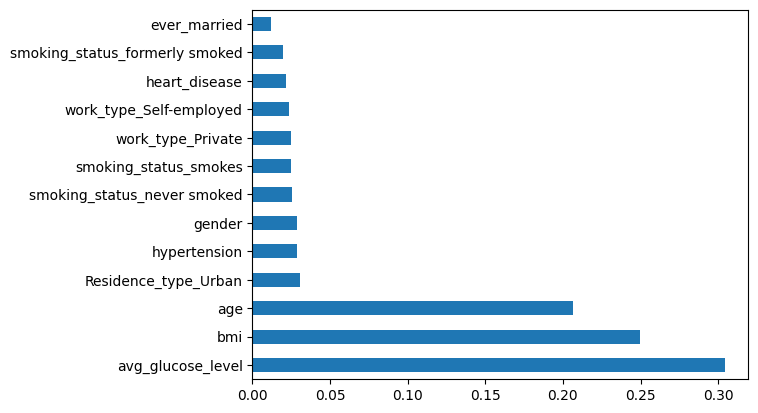

In [55]:
# get importance
importance = model.feature_importances_
# summarize feature importance
feat_importances = pd.Series(importance, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

It is observed from this feature importance result that avg_glucose_level is most significant. And here age and bmi are less important than avg_glucose_level but far more significant than others.

#### XGBoost

In [56]:
pip install xgboost

  Using cached xgboost-1.6.2-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl (1.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [57]:
# xgboost for feature importance
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
# define the model
model_xgb = XGBClassifier()
# Train the model using the training sets
model_xgb.fit(X_train,y_train)

# Make predictions using the training set
y_pred = model_xgb.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)


Mean squared error: 0.00
Coefficient of determination: 1.00
R^2 score on tarining set = 1.0


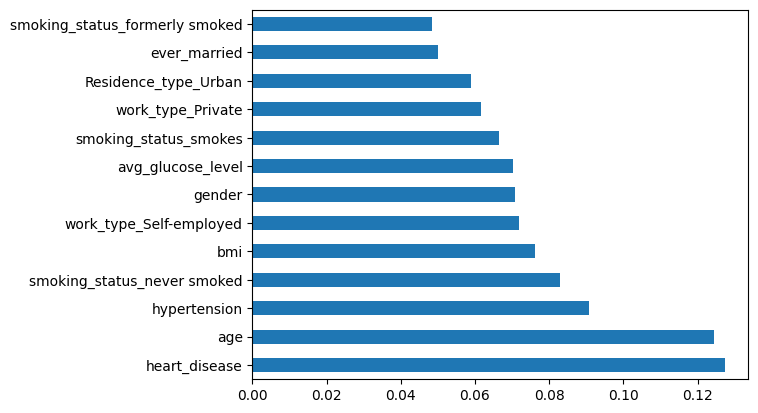

In [58]:
# get importance
importance = model_xgb.feature_importances_
# summarize feature importance
feat_importances = pd.Series(importance, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

Here age and heart_disease are top 2 important feature.

### Imputation method for missing data 

We remove 1%, 5%, and 10% of data randomly and impute the values back using 3 imputation methods-imputing with mean, KNN and mice imputation[4].

#### Remove 1%, 5% and 10% of data randomly


In [59]:
from itertools import product
from random import sample

# remove 1% data randomly
p = 0.01
n = int(data.shape[0]*data.shape[1]*p)          #Calculate count of nans

#Sample exactly n indexes
ids = sample(list(product(range(data.shape[0]), range(data.shape[1]))), n)
idx, idy = list(zip(*ids))

dt = data.to_numpy().astype(float)            #Get data as numpy
dt[idx, idy]=np.nan                         #Update numpy view with np.nan

#Assign to new dataframe
new_df_1 = pd.DataFrame(dt, columns=data.columns, index=data.index)
new_df_1.isnull().sum()
#new_df_1.head()

gender                            38
age                               57
hypertension                      42
heart_disease                     61
ever_married                      46
avg_glucose_level                 51
bmi                               58
stroke                            54
work_type_Private                 50
work_type_Self-employed           43
work_type_children                44
smoking_status_formerly smoked    48
smoking_status_never smoked       46
smoking_status_smokes             58
Residence_type_Urban              51
dtype: int64

In [60]:
# remove 5% data randomly
p = 0.05
n = int(data.shape[0]*data.shape[1]*p)          #Calculate count of nans

#Sample exactly n indexes
ids = sample(list(product(range(data.shape[0]), range(data.shape[1]))), n)
idx, idy = list(zip(*ids))

dt = data.to_numpy().astype(float)            #Get data as numpy
dt[idx, idy]=np.nan                         #Update numpy view with np.nan

#Assign to new dataframe
new_df_5 = pd.DataFrame(dt, columns=data.columns, index=data.index)
new_df_5.isnull().sum()

gender                            250
age                               264
hypertension                      239
heart_disease                     258
ever_married                      225
avg_glucose_level                 245
bmi                               244
stroke                            276
work_type_Private                 238
work_type_Self-employed           240
work_type_children                229
smoking_status_formerly smoked    264
smoking_status_never smoked       256
smoking_status_smokes             265
Residence_type_Urban              242
dtype: int64

In [61]:
# remove 10% data randomly
p = 0.1
n = int(data.shape[0]*data.shape[1]*p)          #Calculate count of nans

#Sample exactly n indexes
ids = sample(list(product(range(data.shape[0]), range(data.shape[1]))), n)
idx, idy = list(zip(*ids))

dt = data.to_numpy().astype(float)            #Get data as numpy
dt[idx, idy]=np.nan                         #Update numpy view with np.nan

#Assign to new dataframe
new_df_10 = pd.DataFrame(dt, columns=data.columns, index=data.index)
new_df_10.isnull().sum()
#new_df_10.head()
new_df_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          4521 non-null   float64
 1   age                             4502 non-null   float64
 2   hypertension                    4461 non-null   float64
 3   heart_disease                   4511 non-null   float64
 4   ever_married                    4479 non-null   float64
 5   avg_glucose_level               4504 non-null   float64
 6   bmi                             4489 non-null   float64
 7   stroke                          4467 non-null   float64
 8   work_type_Private               4501 non-null   float64
 9   work_type_Self-employed         4498 non-null   float64
 10  work_type_children              4457 non-null   float64
 11  smoking_status_formerly smoked  4481 non-null   float64
 12  smoking_status_never smoked     44

##### Impute missing data values by MEAN, KNN Imputation and Regression(Here we using MICE) with 1% data randomly removed

Logistic Regression F1 Score: 0.9565217391304348
The logistic Regression model's accuracy score when imputing data with mean is 95.652174 %.


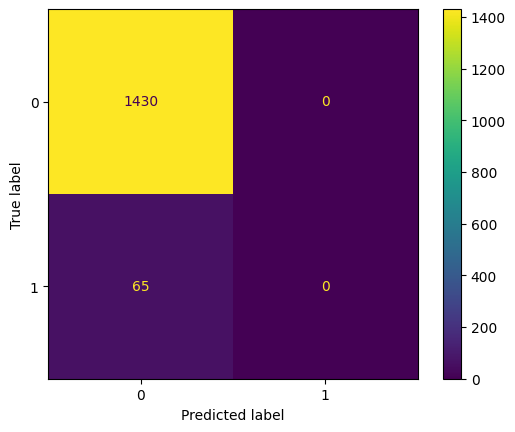

In [62]:
#filling with mean
new_df_1_mean=new_df_1.copy()
for c in new_df_1_mean[:]:
    new_df_1_mean[c]=new_df_1_mean[c].fillna(new_df_1_mean[c].mean())

new_df_1_mean.stroke=new_df_1_mean.stroke.astype(int)

X = new_df_1_mean[['age', 'avg_glucose_level', 'bmi', 'gender', 'hypertension',
       'heart_disease', 'ever_married', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'Residence_type_Urban']]
y = new_df_1_mean['stroke']

#Spliting data 
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.3, random_state=1010)

X_train_mice, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.35, random_state=1010)

logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)


print(f"Logistic Regression F1 Score: {metrics.f1_score(y_test, y_pred, average='micro')}")
print("The logistic Regression model's accuracy score when imputing data with mean is {} %.".format(round(metrics.accuracy_score(y_pred, y_test)*100,6)))

#plot_confusion_matrix(logit, X_test, y_test) 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

Logistic Regression F1 Score: 0.9565217391304348
The logistic Regression model's accuracy score with knn imputation is 95.652174 %.


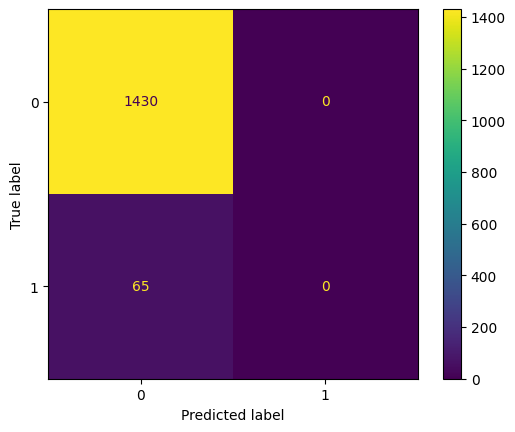

In [63]:
#filling with knn imputation
from sklearn.impute import KNNImputer

new_df_1_knn=new_df_1.copy()

imputer = KNNImputer(n_neighbors=5)
new_df_1_knn = pd.DataFrame(imputer.fit_transform(new_df_1_knn),columns = new_df_1_knn.columns)

new_df_1_knn.stroke=new_df_1_knn.stroke.astype(int)

X = new_df_1_knn[['age', 'avg_glucose_level', 'bmi', 'gender', 'hypertension',
       'heart_disease', 'ever_married', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'Residence_type_Urban']]
y = new_df_1_knn['stroke']

#Spliting data 
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.3, random_state=1010)

X_train_mice, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.35, random_state=1010)

logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)

print(f"Logistic Regression F1 Score: {metrics.f1_score(y_test, y_pred, average='micro')}")
print("The logistic Regression model's accuracy score with knn imputation is {} %.".format(round(metrics.accuracy_score(y_pred, y_test)*100,6)))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

[IterativeImputer] Completing matrix with shape (4981, 15)
[IterativeImputer] Ending imputation round 1/100, elapsed time 0.14
[IterativeImputer] Change: 37.88196331275196, scaled tolerance: 0.27174000000000004 
[IterativeImputer] Ending imputation round 2/100, elapsed time 0.27
[IterativeImputer] Change: 3.788679867173092, scaled tolerance: 0.27174000000000004 
[IterativeImputer] Ending imputation round 3/100, elapsed time 0.46
[IterativeImputer] Change: 0.5940078091601134, scaled tolerance: 0.27174000000000004 
[IterativeImputer] Ending imputation round 4/100, elapsed time 0.62
[IterativeImputer] Change: 0.13782987847768613, scaled tolerance: 0.27174000000000004 
[IterativeImputer] Early stopping criterion reached.
Logistic Regression F1 Score: 0.9558528428093646
The logistic Regression model's accuracy score with knn imputation is 95.585284 %.


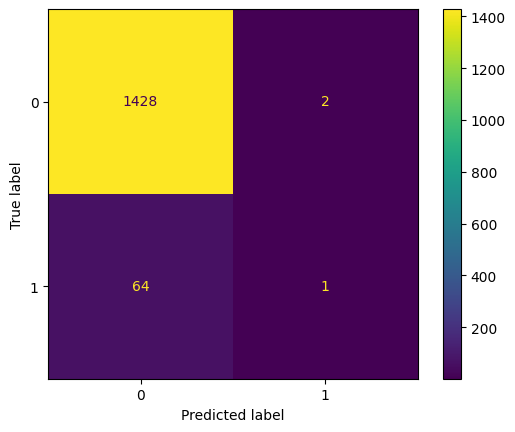

In [64]:
#filling with mice imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
new_df_1_mice=new_df_1.copy()
lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=100, verbose=2, imputation_order='roman',random_state=0)
new_df_1_mice=pd.DataFrame(imp.fit_transform(new_df_1_mice), columns = new_df_1_mice.columns)
#new_df_10_mice.isnull().sum()
new_df_1_mice.stroke=new_df_1_mice.stroke.astype(int)

X = new_df_1_mice[['age', 'avg_glucose_level', 'bmi', 'gender', 'hypertension',
       'heart_disease', 'ever_married', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'Residence_type_Urban']]
y = new_df_1_mice['stroke']

#Spliting data 
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.3, random_state=1010)

X_train_mice, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.35, random_state=1010)

logit = LogisticRegression(max_iter=1000)
logit.fit(X_train_mice, y_train)
y_pred = logit.predict(X_test)

print(f"Logistic Regression F1 Score: {metrics.f1_score(y_test, y_pred, average='micro')}")
print("The logistic Regression model's accuracy score with knn imputation is {} %.".format(round(metrics.accuracy_score(y_pred, y_test)*100,6)))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

##### Impute missing data values by MEAN, KNN Imputation and Regression(Here we using MICE) with 5% data randomly removed

Logistic Regression F1 Score: 0.9418060200668896
The logistic Regression model's accuracy score when imputing data with mean is 94.180602 %.


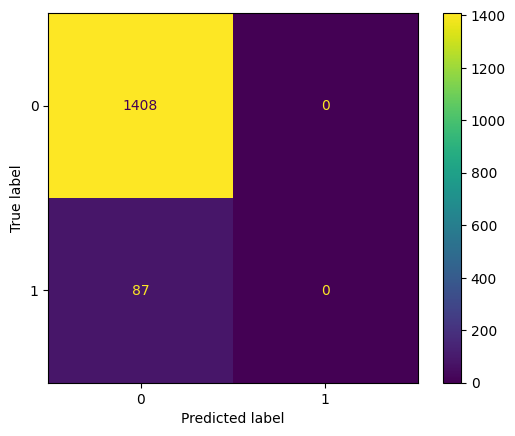

In [65]:
#filling with mean
new_df_5_mean=new_df_5.copy()
for c in new_df_5_mean[:]:
    new_df_5_mean[c]=new_df_5_mean[c].fillna(new_df_5_mean[c].mean())
#new_df_10_mean.isnull().sum()
#new_df_10_mean.head()

new_df_5_mean.stroke=new_df_5_mean.stroke.astype(int)

X = new_df_5_mean[['age', 'avg_glucose_level', 'bmi', 'gender', 'hypertension',
       'heart_disease', 'ever_married', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'Residence_type_Urban']]
y = new_df_5_mean['stroke']

#Spliting data
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.35, random_state=101)


logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)

print(f"Logistic Regression F1 Score: {metrics.f1_score(y_test, y_pred, average='micro')}")
print("The logistic Regression model's accuracy score when imputing data with mean is {} %.".format(round(metrics.accuracy_score(y_pred, y_test)*100,6)))

#plot_confusion_matrix(logit, X_test, y_test) 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

Logistic Regression F1 Score: 0.9585284280936455
The logistic Regression model's accuracy score with knn imputation is 95.852843 %.


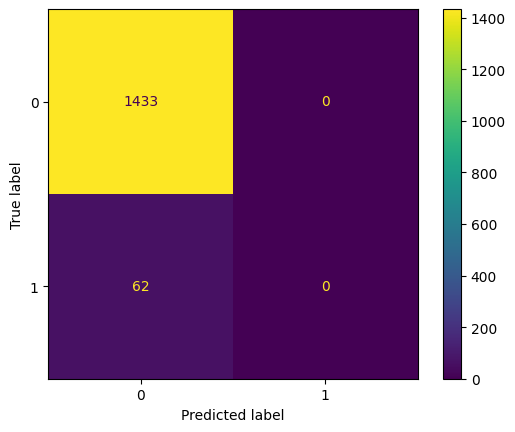

In [66]:
#filling with knn imputation
from sklearn.impute import KNNImputer

new_df_5_knn=new_df_5.copy()

imputer = KNNImputer(n_neighbors=5)
new_df_5_knn = pd.DataFrame(imputer.fit_transform(new_df_5_knn),columns = new_df_5_knn.columns)

new_df_5_knn.stroke=new_df_5_knn.stroke.astype(int)

X = new_df_5_knn[['age', 'avg_glucose_level', 'bmi', 'gender', 'hypertension',
       'heart_disease', 'ever_married', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'Residence_type_Urban']]
y = new_df_5_knn['stroke']

#Spliting data 
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.3, random_state=1010)

X_train_mice, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.35, random_state=1010)

logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)

print(f"Logistic Regression F1 Score: {metrics.f1_score(y_test, y_pred, average='micro')}")
print("The logistic Regression model's accuracy score with knn imputation is {} %.".format(round(metrics.accuracy_score(y_pred, y_test)*100,6)))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

[IterativeImputer] Completing matrix with shape (4981, 15)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.13
[IterativeImputer] Change: 54.631505919568255, scaled tolerance: 0.26776 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.26
[IterativeImputer] Change: 11.767086744755881, scaled tolerance: 0.26776 
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.39
[IterativeImputer] Change: 3.333585006789788, scaled tolerance: 0.26776 
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.55
[IterativeImputer] Change: 0.8874650803085872, scaled tolerance: 0.26776 
[IterativeImputer] Ending imputation round 5/10, elapsed time 0.67
[IterativeImputer] Change: 0.22966851525979018, scaled tolerance: 0.26776 
[IterativeImputer] Early stopping criterion reached.
Logistic Regression F1 Score: 0.9571906354515051
The logistic Regression model's accuracy score with knn imputation is 95.719064 %.


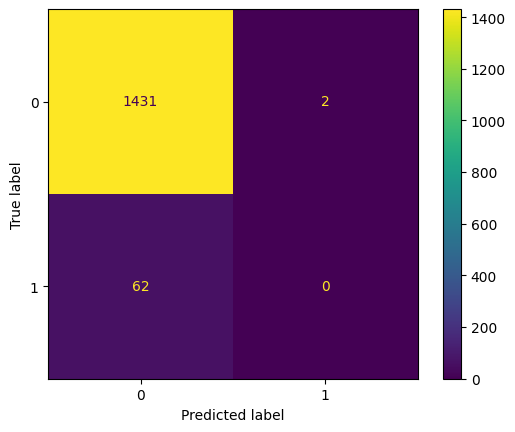

In [67]:
#filling with mice imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
new_df_5_mice=new_df_5.copy()
lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, verbose=2, imputation_order='roman',random_state=0)
new_df_5_mice=pd.DataFrame(imp.fit_transform(new_df_5_mice), columns = new_df_5_mice.columns)
#new_df_5_mice.isnull().sum()
new_df_5_mice.stroke=new_df_5_mice.stroke.astype(int)

X = new_df_5_mice[['age', 'avg_glucose_level', 'bmi', 'gender', 'hypertension',
       'heart_disease', 'ever_married', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'Residence_type_Urban']]
y = new_df_5_mice['stroke']

#Spliting data 
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.3, random_state=1010)

X_train_mice, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.35, random_state=1010)

logit = LogisticRegression(max_iter=1000)
logit.fit(X_train_mice, y_train)
y_pred = logit.predict(X_test)

print(f"Logistic Regression F1 Score: {metrics.f1_score(y_test, y_pred, average='micro')}")
print("The logistic Regression model's accuracy score with knn imputation is {} %.".format(round(metrics.accuracy_score(y_pred, y_test)*100,6)))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

##### Impute missing data values by MEAN, KNN Imputation and Regression(Here we using MICE) with 10% data randomly removed



Logistic Regression F1 Score: 0.9471571906354515
The logistic Regression model's accuracy score when imputing data with mean is 94.715719 %.


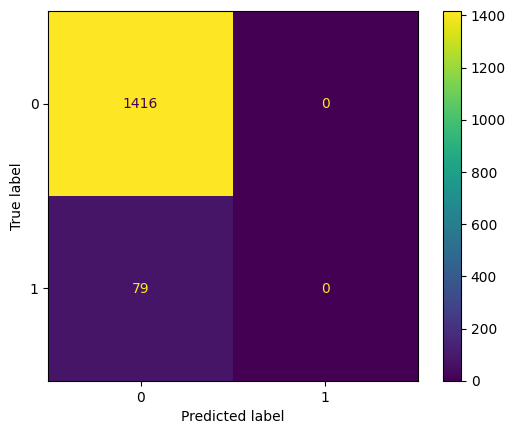

In [68]:
#filling with mean
new_df_10_mean=new_df_10.copy()
for c in new_df_10_mean[:]:
    new_df_10_mean[c]=new_df_10_mean[c].fillna(new_df_10_mean[c].mean())
#new_df_10_mean.isnull().sum()
#new_df_10_mean.head()

new_df_10_mean.stroke=new_df_10_mean.stroke.astype(int)

X = new_df_10_mean[['age', 'avg_glucose_level', 'bmi', 'gender', 'hypertension',
       'heart_disease', 'ever_married', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'Residence_type_Urban']]
y = new_df_10_mean['stroke']

#Spliting data
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.35, random_state=101)


logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)

print(f"Logistic Regression F1 Score: {metrics.f1_score(y_test, y_pred, average='micro')}")
print("The logistic Regression model's accuracy score when imputing data with mean is {} %.".format(round(metrics.accuracy_score(y_pred, y_test)*100,6)))

#plot_confusion_matrix(logit, X_test, y_test) 
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

Logistic Regression F1 Score: 0.9612040133779264
The logistic Regression model's accuracy score with knn imputation is 96.120401 %.


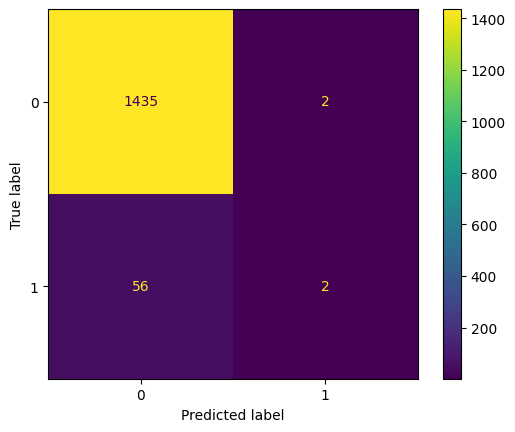

In [69]:
#filling with knn imputation
from sklearn.impute import KNNImputer

new_df_10_knn=new_df_10.copy()

imputer = KNNImputer(n_neighbors=5)
new_df_10_knn = pd.DataFrame(imputer.fit_transform(new_df_10_knn),columns = new_df_10_knn.columns)

new_df_10_knn.stroke=new_df_10_knn.stroke.astype(int)

X = new_df_10_knn[['age', 'avg_glucose_level', 'bmi', 'gender', 'hypertension',
       'heart_disease', 'ever_married', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'Residence_type_Urban']]
y = new_df_10_knn['stroke']

#Spliting data
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.3, random_state=1010)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.35, random_state=1010)

logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)

print(f"Logistic Regression F1 Score: {metrics.f1_score(y_test, y_pred, average='micro')}")
print("The logistic Regression model's accuracy score with knn imputation is {} %.".format(round(metrics.accuracy_score(y_pred, y_test)*100,6)))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

[IterativeImputer] Completing matrix with shape (4981, 15)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.13
[IterativeImputer] Change: 101.74698013463136, scaled tolerance: 0.27174000000000004 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.25
[IterativeImputer] Change: 14.475036702293389, scaled tolerance: 0.27174000000000004 
[IterativeImputer] Ending imputation round 3/10, elapsed time 0.38
[IterativeImputer] Change: 4.640315054530983, scaled tolerance: 0.27174000000000004 
[IterativeImputer] Ending imputation round 4/10, elapsed time 0.49
[IterativeImputer] Change: 2.840675577884558, scaled tolerance: 0.27174000000000004 
[IterativeImputer] Ending imputation round 5/10, elapsed time 0.61
[IterativeImputer] Change: 1.8239844255381317, scaled tolerance: 0.27174000000000004 
[IterativeImputer] Ending imputation round 6/10, elapsed time 0.72
[IterativeImputer] Change: 1.1636632617693472, scaled tolerance: 0.27174000000000004 
[IterativeImputer] Ending

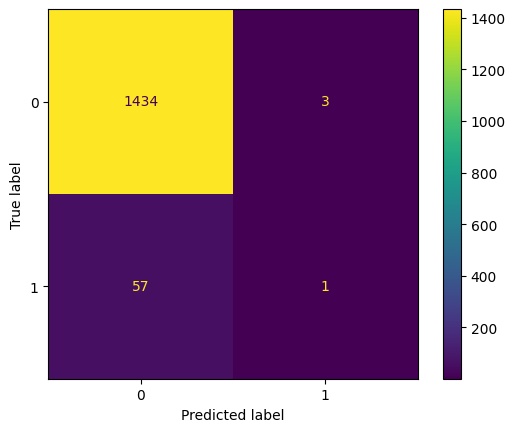

In [70]:
#filling with mice imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
new_df_10_mice=new_df_10.copy()
lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, verbose=2, imputation_order='roman',random_state=0)
new_df_10_mice=pd.DataFrame(imp.fit_transform(new_df_10_mice), columns = new_df_10_mice.columns)
#new_df_10_mice.isnull().sum()
new_df_10_mice.stroke=new_df_10_mice.stroke.astype(int)

X = new_df_10_mice[['age', 'avg_glucose_level', 'bmi', 'gender', 'hypertension',
       'heart_disease', 'ever_married', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'Residence_type_Urban']]
y = new_df_10_mice['stroke']

#Spliting data 
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.3, random_state=1010)

X_train_mice, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.35, random_state=1010)

logit = LogisticRegression(max_iter=1000)
logit.fit(X_train_mice, y_train)
y_pred = logit.predict(X_test)

print(f"Logistic Regression F1 Score: {metrics.f1_score(y_test, y_pred, average='micro')}")
print("The logistic Regression model's accuracy score with knn imputation is {} %.".format(round(metrics.accuracy_score(y_pred, y_test)*100,6)))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

#### Answer following questions
* **What are the data types? (Only numeric and categorical)**<br>
    **A:** &ensp;
    categorical: gender, ever_married, work_type, residence_type, smoking_status.<br>numeric age, hypertension, heart_disease, avg_glucose_level, bmi.<br>(hyoertension & heart_disease have int dtypes, but we can check out that they are in categorical style)
    

* **Are there missing values?**<br>
    **A:**&ensp; No variables have any missing data.
    

* **What are the likely distributions of the numeric variables?**<br>
    **A:**&ensp; Looking at the Q-Q plots and histplot of numeric variables, it appears that one independent numeric variable the BMI is following normal distribution, while avg_glucose_level does not, and we can find that most patients are at a normal level. And age variable is roughly following normal distribution, there are a few outliers in few of age variable which shows data have a concentration in 80 years old patients.
    

* **Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)**<br>
    **A:**&ensp; 'age', 'avg_glucose_level','hypertension', 'heart_disease', 'ever_married', 'bmi', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'smoking_status_never smoked', 'smoking_status_smokes'
    

* **Which independent variables have missing data? How much?** <br>
    **A:**&ensp; No independent variables have any missing data.
    

* **Do the training and test sets have the same data?**<br>
    **A:**&ensp; Yes, most of the data are same in test, train and validation data set except the data points in training set are more and few boundary values are not included in train and validation data set.
    

* **Is the predictor variables independent of all the other predictor variables?**<br>
    **A:**&ensp; No, they are not independet of each other. There is multi - collinearity among lot of the independent variable which is shown by the correlation table and pairplot map
    

* **Which predictor variables are the most important?**<br>
    **A:**&ensp;'age', 'avg_glucose_level','hypertension', 'heart_disease', 'ever_married', 'bmi', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'smoking_status_never smoked', 'smoking_status_smokes'
    

* **Do the ranges of the predictor variables make sense?**<br>
    **A:**&ensp; 1. avg_glucose_level and bmi have some outliers shows that few patients has unnormal bmi and glucose level.<br>2. age are most well distribe and concentrated on middle-age and elderly patients while stroke mostly occur in this age group.<br>3. gender, ever_married, work_type, residence_type, smoking_status have categorical values.
                 

* **What are the distributions of the predictor variables?**   <br>
    **A:** &ensp;1.Looking at the Q-Q plots and histplot of numeric variables, it appears that one independent numeric variable the BMI is following normal distribution, while avg_glucose_level does not, and we can find that most patients are at a normal level. And age variable is roughly following normal distribution, there are a few outliers in few of age variable which shows data have a concentration in 80 years old patients.<br>
    &ensp;2.gender, ever_married, work_type, residence_type, smoking_status,hyoertension and heart_disease are cateforical values.And there value info can be find at columns information above.
    

* **Remove outliers and keep outliers (does if have an effect of the final predictive model)?**<br>
    **A:**&ensp; From the linear regression model perfomance above, we can see that remove or keep outliers have only modest effect on the final predictive model because number of outliers in this dataset are small. <br>
    

* **Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error. For categorical data, calculate the accuracy and a confusion matrix.**<br>
    **A:**&ensp; Here we using 3 imputation method(mean replacement, knn and mice). Check the accuracy and confusion matrix, we can assume that knn imputation method is slightly outperform than mice and mean replacement when used in this dataset.<br>

### Conclusion
From the analysis done above on the data set, we can find that there is multicolinearity and ecxpet gender all other dependent variables are significant or useful for outcome variables.


### References
[1] https://en.wikipedia.org/wiki/Stroke<br>
[2] https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e<br>
[3] https://www.kaggle.com/code/sh0wmaker/95-score-eda-feature-engineering-modeling#Part2:-Feature-Engineering-and-Data-Cleaning<br>
[4] https://www.youtube.com/watch?v=fYhr8eF1ubo<br>
[5] https://stackoverflow.com/questions/69490124/randomly-replace-10-of-dataframe-with-nans<br>
[6] https://www.numpyninja.com/post/mice-and-knn-missing-value-imputations-through-python<br>

The algorithms were referred directly from the Sckit learn official documentation. Visualization was referred from the Machine Learning with scikit-learn Quick Start Guide. Randomly remove data and the MICE imputation code are referred to [5]and[6] with some argument and variables adjustment and modification. 

Copyright 2022 Yanping Fu<br>
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:<br>
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.<br>
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.